In [1]:
import pandas as pd 
import numbers as np
import matplotlib_inline as plt
# %matplotlib inline
import seaborn as sns
import math


In [2]:
data = pd.read_csv('titanic_dataset.csv')
data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C


In [3]:
data.shape

(1309, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [5]:
print("# no of passenger in original data "+ str(len(data.index)))

# no of passenger in original data 1309


## ANALYSING DATA

<AxesSubplot:xlabel='survived', ylabel='count'>

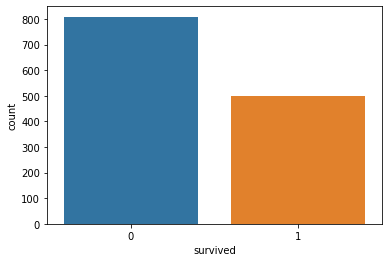

In [6]:
sns.countplot(x="survived",data=data)

<AxesSubplot:xlabel='survived', ylabel='count'>

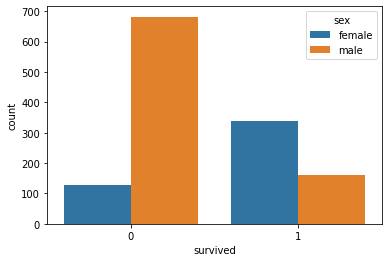

In [7]:
sns.countplot(x="survived",hue="sex",data=data)

<AxesSubplot:xlabel='survived', ylabel='count'>

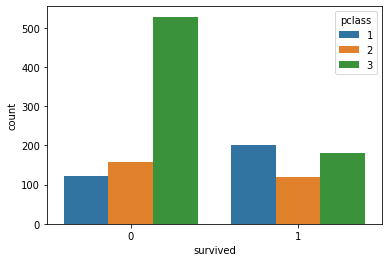

In [8]:
sns.countplot(x="survived",hue="pclass",data=data)

<AxesSubplot:ylabel='Frequency'>

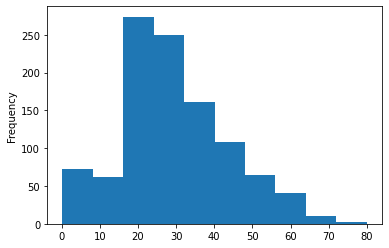

In [9]:
data["age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

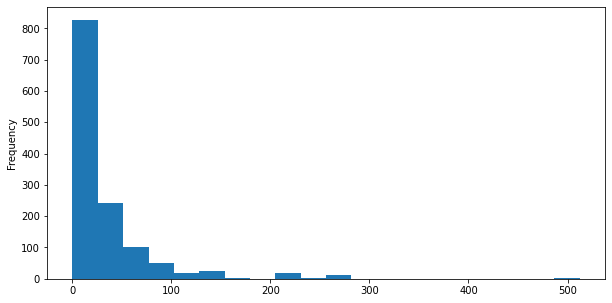

In [10]:
data["fare"].plot.hist(bins=20,figsize=(10,5))

<AxesSubplot:xlabel='sibsp', ylabel='count'>

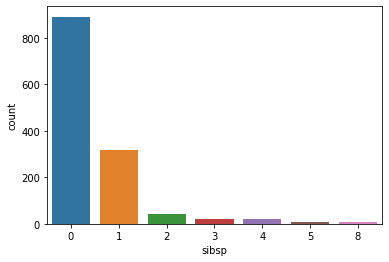

In [11]:
sns.countplot(x="sibsp",data=data)

## Data Wrangling

In [12]:
data.isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1304,False,False,False,False,False,False,False,False,False,True,False
1305,False,False,False,False,True,False,False,False,False,True,False
1306,False,False,False,False,False,False,False,False,False,True,False
1307,False,False,False,False,False,False,False,False,False,True,False


In [13]:
data.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

<AxesSubplot:>

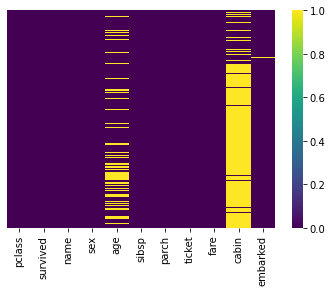

In [14]:
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis")

<AxesSubplot:xlabel='pclass', ylabel='age'>

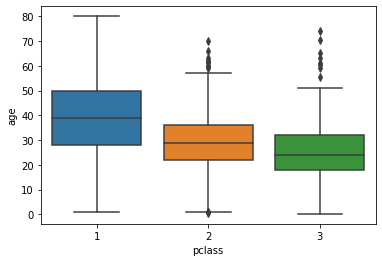

In [15]:
sns.boxplot(x="pclass",y="age",data=data)

In [16]:
data.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C


In [17]:
data.drop("cabin",axis=1,inplace=True)

In [18]:
# data.drop("age",axis=1,inplace=True)

In [19]:
data.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S


In [20]:
data.dropna(inplace=True)

<AxesSubplot:>

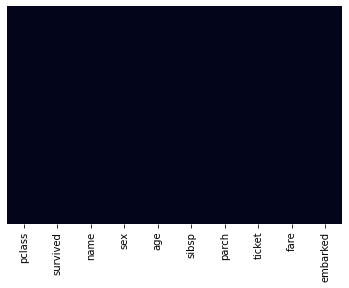

In [21]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [22]:
data.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [23]:
sex=pd.get_dummies(data['sex'],drop_first=True)
sex.head(5)

,male
0,0
1,1
2,0
3,1
4,0


In [24]:
embark = pd.get_dummies(data['embarked'])
embark.head(5)

,C,Q,S
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [25]:
Pcl = pd.get_dummies(data['pclass'],drop_first=True)
Pcl.head(5)

,2,3
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [26]:
data = pd.concat([data,sex,embark,Pcl],axis=1)

In [27]:
data.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,male,C,Q,S,2,3
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,0,0,0,1,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,0,0,1,0,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,0,0,1,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,1,0,0,1,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,0,0,1,0,0


In [28]:
data.drop(['sex','embarked','name','ticket'],axis=1,inplace=True)

In [29]:
data.head(5)

,pclass,survived,age,sibsp,parch,fare,male,C,Q,S,2,3
0,1,1,29.0000,0,0,211.3375,0,0,0,1,0,0
1,1,1,0.9167,1,2,151.5500,1,0,0,1,0,0
2,1,0,2.0000,1,2,151.5500,0,0,0,1,0,0
3,1,0,30.0000,1,2,151.5500,1,0,0,1,0,0
4,1,0,25.0000,1,2,151.5500,0,0,0,1,0,0


In [30]:
data.drop(['pclass'],axis=1,inplace=True)

In [31]:
data.head(5)

,survived,age,sibsp,parch,fare,male,C,Q,S,2,3
0,1,29.0000,0,0,211.3375,0,0,0,1,0,0
1,1,0.9167,1,2,151.5500,1,0,0,1,0,0
2,0,2.0000,1,2,151.5500,0,0,0,1,0,0
3,0,30.0000,1,2,151.5500,1,0,0,1,0,0
4,0,25.0000,1,2,151.5500,0,0,0,1,0,0


In [34]:
x= data.drop("survived",axis=1)
y=data["survived"]

In [36]:
# from sklearn.cross_validation import test_train_split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logmodel = LogisticRegression()

In [41]:
logmodel.fit(x_train,y_train)

C:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Program Files\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
prediction = logmodel.predict(x_test)

C:\Program Files\Python310\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [51]:
from sklearn.metrics import classification_report


In [52]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       177
           1       0.73      0.71      0.72       136

    accuracy                           0.76       313
   macro avg       0.76      0.75      0.76       313
weighted avg       0.76      0.76      0.76       313



In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(y_test,prediction)

array([[142,  35],
       [ 40,  96]], dtype=int64)

In [57]:
from sklearn.metrics import plot_confusion_matrix

In [59]:
# matrix = plot_confusion_matrix(logmodel,y_test,prediction)


In [60]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y_test,prediction)*100

76.03833865814697

In [62]:
from sklearn.metrics import f1_score

In [65]:
f1_score(y_test,prediction)*100

71.91011235955057